## RM ANOVA in Python

In [1]:
import pandas as pd
import pingouin as pg


df = pd.read_csv('./Python_ANOVA/rmAOV2way.csv')
df.head()

,Sub_id,rt,iv1,iv2
0,1,1082.986553,noise,down
1,2,938.799689,noise,down
2,3,1101.470970,noise,down
3,4,1123.030275,noise,down
4,5,938.051589,noise,down


### One-Way ANOVA

In [2]:
aov = pg.rm_anova(dv='rt', within='iv1',
                   subject='Sub_id', data=df, detailed=True)
print(aov.round(2))

  Source          SS  DF          MS        F        p-unc    np2 eps
0    iv1  8061895.94   1  8061895.94  2207.02  1.90585e-48  0.974   1
1  Error   215518.06  59     3652.85        -            -      -   -


### Two-Way ANOVA

In [3]:
 aov = pg.rm_anova(dv='rt',
                   within=['iv1', 'iv2'],
                   subject='Sub_id', data=df)
print(aov.round(2))

      Source           SS  ddof1  ddof2           MS        F  p-unc  \
0        iv1  24185687.82      1     59  24185687.82  2207.02   0.00   
1        iv2   4836438.74      2    118   2418219.37   275.41   0.00   
2  iv1 * iv2     39246.50      2    118     19623.25     1.86   0.16   

   p-GG-corr   np2   eps  
0       0.00  0.97  1.00  
1       0.00  0.82  0.99  
2       0.16  0.03  0.99  


### Interaction Plot

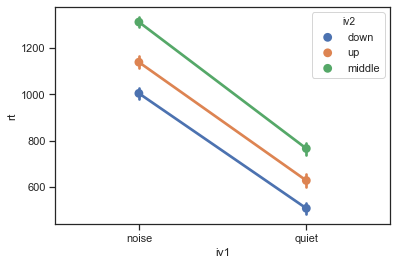

In [4]:
%matplotlib inline
import seaborn as sns


ax = sns.pointplot(x="iv1", y="rt", hue="iv2",
                    data=df)